In [2]:
import numpy as np
import pandas as pd
#교통사고 데이터(CSV파일) 불러오기
accident_data = pd.read_csv("accident_data.csv",encoding = 'EUC-KR')

#쓰지않는 데이터 열 삭제
del accident_data['발생시간']
del accident_data['발생지_시군구']
del accident_data['발생지_시도']
del accident_data['법정동명']

# '발생일'컬럼을 날짜 데이터로 변환
accident_data['발생일'] = pd.to_datetime(accident_data['발생일'])

#같은 날짜에 발생한 사건은 합치기
accident_data_final = accident_data.groupby('발생일').sum()

# 인덱스 이름 '날짜'로 변환
accident_data_final.index.name = '날짜'
accident_data_final

,사고건수,사망자수,중상자수,경상자수,부상신고자수
날짜,,,,,
2017-01-01,73,2,25,90,10
2017-01-02,82,4,27,92,17
2017-01-03,88,1,25,80,13
2017-01-04,115,1,39,99,25
2017-01-05,103,1,34,111,8
...,...,...,...,...,...
2019-12-27,94,0,27,88,14
2019-12-28,94,0,27,105,10
2019-12-29,78,1,26,87,7


In [3]:
# 강수량 데이터(CSV파일) 불러오기
rain_df = pd.read_csv("rain_data.csv",encoding = 'EUC-KR')

# 날짜' 날짜데이터 형식으로 변환
rain_df['날짜'] = pd.to_datetime(rain_df['날짜'])

# 지점 열 삭제
rain_df.drop('지점', axis=1, inplace=True)

# 강수량 열 이름을 비로 변경
rain_df.rename(columns={'강수량(mm)': '비'}, inplace=True)

rain_df.loc[rain_df['비'].notnull(), '비'] = '비'

# 눈일수 데이터(CSV파일) 불러오기
snow_data = pd.read_csv("snow_data.csv",encoding = 'EUC-KR')
snow_df = snow_data

# 연도와 날짜 열을 합치고 날짜 형식으로 변환
snow_df['날짜'] = pd.to_datetime(snow_df['연도'].astype(str) + snow_df['날짜'].astype(str), format='%Y%m%d')

# 기상현상 열 이름을 눈으로 변경
snow_df.rename(columns={'기상현상': '눈'}, inplace=True)

# 열의 순서 변경, 연도, 지점, 일 최심신적설(cm) 열 삭제
snow_df = snow_df[['날짜', '눈']]

# 데이터프레임의 '눈'열 값들을 '눈'으로 변경
snow_df['눈'] = '눈'

C:\Users\user\AppData\Local\Temp\ipykernel_12336\1261135189.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snow_df['눈'] = '눈'


In [4]:
# 교통사고 데이터, 눈, 비 데이터프레임 합치기

# 'accident_data_final' 데이터프레임과 'rain_df' 데이터프레임을 날짜를 기준으로 병합
merged_df = pd.merge(accident_data_final, rain_df, on='날짜', how='left')

# 'merged_df'와 'snow_df'를 날짜를 기준으로 병합
merged_df = pd.merge(merged_df, snow_df, on='날짜', how='left')

merged_df['비'].fillna('', inplace=True)
merged_df['눈'].fillna('', inplace=True)

merged_df['날씨'] = merged_df['비'] + merged_df['눈']
merged_df

,날짜,사고건수,사망자수,중상자수,경상자수,부상신고자수,비,눈,날씨
0,2017-01-01,73,2,25,90,10,,,
1,2017-01-02,82,4,27,92,17,비,,비
2,2017-01-03,88,1,25,80,13,,,
3,2017-01-04,115,1,39,99,25,,,
4,2017-01-05,103,1,34,111,8,,,
...,...,...,...,...,...,...,...,...,...
1091,2019-12-27,94,0,27,88,14,,,
1092,2019-12-28,94,0,27,105,10,,,
1093,2019-12-29,78,1,26,87,7,비,,비
1094,2019-12-30,91,1,19,93,53,비,눈,비눈


In [5]:
snow_count = merged_df[merged_df['날씨'] == '눈'].shape[0]
rain_count = merged_df[merged_df['날씨'] == '비'].shape[0]
snow_rain_count = merged_df[merged_df['날씨'] == '비눈'].shape[0]

merged_df['날씨'] = merged_df['날씨'].replace('', '맑음')
merged_df['날씨'] = merged_df['날씨'].replace('비눈', '눈')

print("눈 개수:", snow_count)
print("비 개수:", rain_count)
print("비눈 개수:", snow_rain_count)

눈 개수: 9
비 개수: 344
비눈 개수: 68


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [7]:
import pandas as pd

def sum_3_by_weather(dataframe):
    grouped = dataframe.groupby('날씨')
    sums = grouped['경상자수'].sum()
    new_dataframe = pd.DataFrame({'날씨': sums.index, '경상자수_합계': sums.values})
    return new_dataframe

data = merged_df
df = pd.DataFrame(data)

result_df_3 = sum_3_by_weather(df)

def sum_2_by_weather(dataframe):
    grouped = dataframe.groupby('날씨')
    sums = grouped['중상자수'].sum()
    new_dataframe = pd.DataFrame({'날씨': sums.index, '중상자수_합계': sums.values})
    return new_dataframe

data = merged_df
df = pd.DataFrame(data)

result_df_2 = sum_2_by_weather(df)
del result_df_2['날씨']

def sum_1_by_weather(dataframe):
    grouped = dataframe.groupby('날씨')
    sums = grouped['사망자수'].sum()
    new_dataframe = pd.DataFrame({'날씨': sums.index, '사망자수_합계': sums.values})
    return new_dataframe

data = merged_df
df = pd.DataFrame(data)

result_df_1 = sum_1_by_weather(df)
del result_df_1['날씨']

def sum_0_by_weather(dataframe):
    grouped = dataframe.groupby('날씨')
    sums = grouped['부상신고자수'].sum()
    new_dataframe = pd.DataFrame({'날씨': sums.index, '부상자수_합계': sums.values})
    return new_dataframe

data = merged_df
df = pd.DataFrame(data)

result_df_0 = sum_0_by_weather(df)
del result_df_0['날씨']

In [8]:
final_result_df = pd.concat([result_df_3,result_df_2,result_df_1,result_df_0], axis=1)
final_result_df

,날씨,경상자수_합계,중상자수_합계,사망자수_합계,부상자수_합계
0,눈,8369,2476,65,1007
1,맑음,69270,21150,530,8878
2,비,35542,10371,303,4565


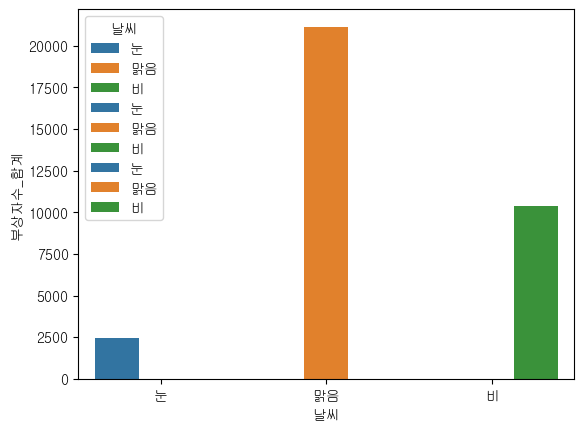

In [9]:
asdf_1 = sns.barplot(x='날씨', y = '중상자수_합계', hue = '날씨', data = final_result_df)

asdf_2 = sns.barplot(x='날씨', y = '사망자수_합계', hue = '날씨', data = final_result_df)

asdf_3 = sns.barplot(x='날씨', y = '부상자수_합계', hue = '날씨', data = final_result_df)

plt.show()

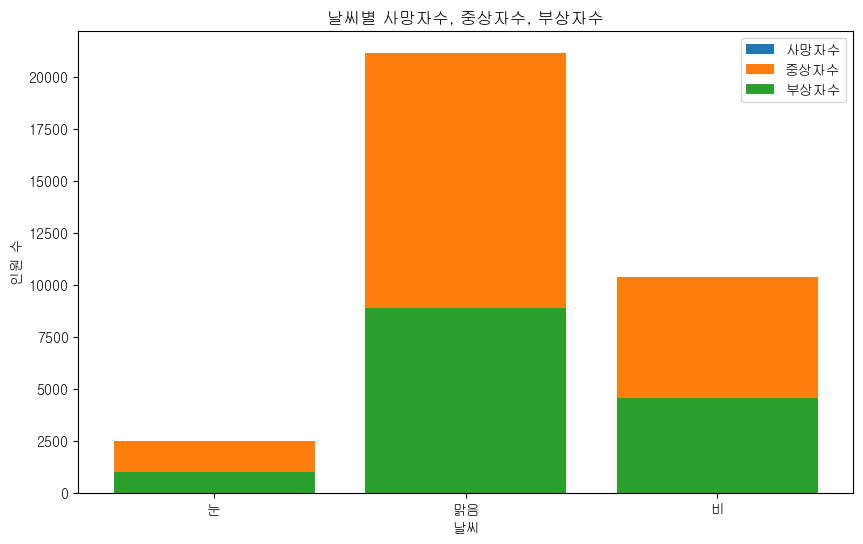

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 샘플 데이터프레임 생성
data = final_result_df
df = pd.DataFrame(data)

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(df['날씨'], df['사망자수_합계'], label='사망자수')
plt.bar(df['날씨'], df['중상자수_합계'], label='중상자수')
plt.bar(df['날씨'], df['부상자수_합계'], label='부상자수')
plt.xlabel('날씨')
plt.ylabel('인원 수')
plt.title('날씨별 사망자수, 중상자수, 부상자수')
plt.legend()
plt.show()


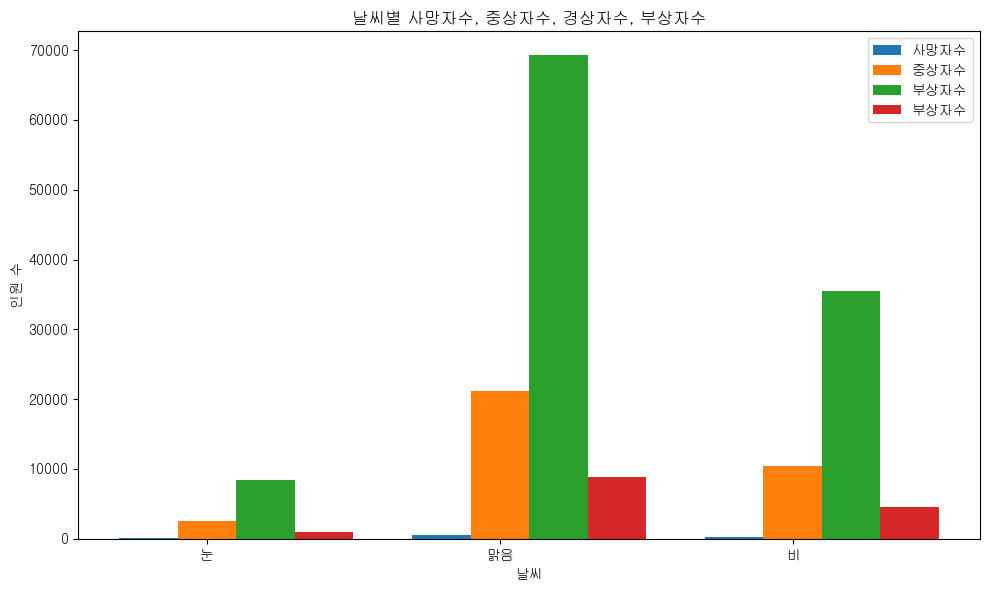

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 샘플 데이터프레임 생성
data = final_result_df
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(df['날씨']))

plt.bar(index, df['사망자수_합계'], bar_width, label='사망자수')
plt.bar(index + bar_width, df['중상자수_합계'], bar_width, label='중상자수')
plt.bar(index + 2 * bar_width, df['경상자수_합계'], bar_width, label='부상자수')
plt.bar(index + 3 * bar_width, df['부상자수_합계'], bar_width, label='부상자수')
plt.xlabel('날씨')
plt.ylabel('인원 수')
plt.title('날씨별 사망자수, 중상자수, 경상자수, 부상자수')
plt.xticks(index + bar_width, df['날씨'])
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
df = merged_df

# '비'가 써져 있는 데이터만 필터링하여 새로운 데이터프레임 생성
random_rain_df = df[df['비'] == '비'].sample(n=50)
random_snow_df = df[df['눈'] == '눈'].sample(n=50)

merged_df_random = pd.concat([random_rain_df, random_snow_df], ignore_index=True)
merged_df_random

,날짜,사고건수,사망자수,중상자수,경상자수,부상신고자수,비,눈,날씨
0,2019-03-23,128,1,29,133,23,비,눈,눈
1,2018-11-07,120,0,48,96,13,비,,비
2,2019-01-15,95,0,32,103,8,비,,비
3,2017-06-21,101,3,30,87,17,비,,비
4,2017-06-26,111,1,27,112,11,비,,비
...,...,...,...,...,...,...,...,...,...
95,2018-02-11,76,0,23,78,14,비,눈,눈
96,2019-03-23,128,1,29,133,23,비,눈,눈
97,2018-01-31,118,0,32,126,10,비,눈,눈
98,2017-12-15,123,1,34,127,12,비,눈,눈


In [13]:
def sum_3_by_weather_random(dataframe):
    grouped = dataframe.groupby('날씨')
    sums = grouped['경상자수'].sum()
    new_dataframe = pd.DataFrame({'날씨': sums.index, '경상자수_합계_랜덤': sums.values})
    return new_dataframe

data = merged_df_random
df = pd.DataFrame(data)
result_df_3_random = sum_3_by_weather_random(df)
print(result_df_3_random)

  날씨  경상자수_합계_랜덤
0  눈        6215
1  비        4457


In [14]:
def sum_2_by_weather_random(dataframe):
    grouped = dataframe.groupby('날씨')
    sums = grouped['중상자수'].sum()
    new_dataframe = pd.DataFrame({'날씨': sums.index, '중상자수_합계_랜덤': sums.values})
    return new_dataframe

data = merged_df
df = pd.DataFrame(data)

result_df_2_random = sum_2_by_weather_random(df)
del result_df_2_random['날씨']
print(result_df_2_random)

   중상자수_합계_랜덤
0        2476
1       21150
2       10371


In [15]:
def sum_1_by_weather_random(dataframe):
    grouped = dataframe.groupby('날씨')
    sums = grouped['사망자수'].sum()
    new_dataframe = pd.DataFrame({'날씨': sums.index, '사망자수_합계_랜덤': sums.values})
    return new_dataframe

data = merged_df
df = pd.DataFrame(data)

result_df_1_random = sum_1_by_weather_random(df)
del result_df_1_random['날씨']
print(result_df_1_random)

   사망자수_합계_랜덤
0          65
1         530
2         303


In [16]:
def sum_0_by_weather_random(dataframe):
    grouped = dataframe.groupby('날씨')
    sums = grouped['부상신고자수'].sum()
    new_dataframe = pd.DataFrame({'날씨': sums.index, '부상신고자수_합계_랜덤': sums.values})
    return new_dataframe

data = merged_df
df = pd.DataFrame(data)

result_df_0_random = sum_0_by_weather_random(df)
del result_df_0_random['날씨']
print(result_df_0_random)

   부상신고자수_합계_랜덤
0          1007
1          8878
2          4565


In [17]:
final_result_df_random = pd.concat([result_df_3_random,result_df_2_random,result_df_1_random,result_df_0_random], axis=1)
final_result_df_random['날씨'].fillna('맑음', inplace=True)
final_result_df_random.head()

,날씨,경상자수_합계_랜덤,중상자수_합계_랜덤,사망자수_합계_랜덤,부상신고자수_합계_랜덤
0,눈,6215.0,2476,65,1007
1,비,4457.0,21150,530,8878
2,맑음,NaN,10371,303,4565


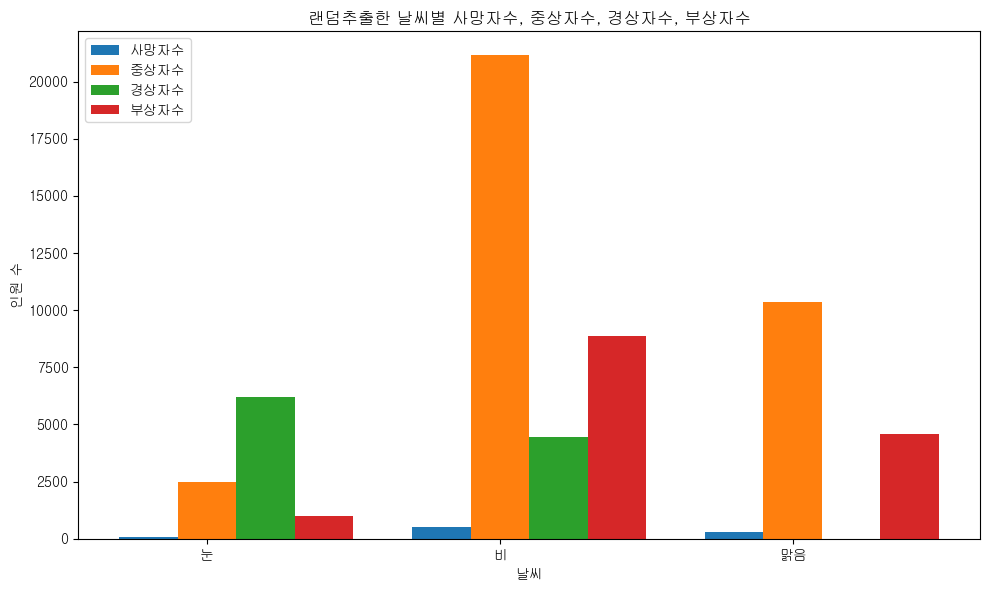

In [18]:
# 샘플 데이터프레임 생성
data = final_result_df_random
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(df['날씨']))

plt.bar(index, df['사망자수_합계_랜덤'], bar_width, label='사망자수')
plt.bar(index + bar_width, df['중상자수_합계_랜덤'], bar_width, label='중상자수')
plt.bar(index + 2 * bar_width, df['경상자수_합계_랜덤'], bar_width, label='경상자수')
plt.bar(index + 3 * bar_width, df['부상신고자수_합계_랜덤'], bar_width, label='부상자수')
plt.xlabel('날씨')
plt.ylabel('인원 수')
plt.title('랜덤추출한 날씨별 사망자수, 중상자수, 경상자수, 부상자수')
plt.xticks(index + bar_width, df['날씨'])
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
ac_df = accident_data_final.reset_index()

In [20]:
ac_df['년도'] = ac_df.날짜.dt.year

In [21]:
ac_df.drop('날짜', inplace=True, axis=1)

In [22]:
ac_eda = ac_df.groupby('년도').mean()

In [23]:
dd = pd.read_csv('./도로시설물_20230611004413.csv')

In [24]:
dd.iloc[10:,2:].mean(axis=0)

2017    3.594746e+101
2018    3.688348e+101
2019    3.706347e+101
dtype: float64

In [25]:
dd.iloc[10:,2:].astype('float').mean(axis=0)

2017    7431.44
2018    7569.24
2019    7706.04
dtype: float64

In [26]:
ac_eda['가로등 수'] = dd.iloc[10:,2:].astype('float').mean(axis=0).values

In [27]:
ac_eda

,사고건수,사망자수,중상자수,경상자수,부상신고자수,가로등 수
년도,,,,,,
2017,105.821918,0.939726,32.780822,100.838356,13.805479,7431.44
2018,106.287671,0.832877,31.183562,103.356164,12.723288,7569.24
2019,107.556164,0.684932,29.082192,105.580822,13.019178,7706.04


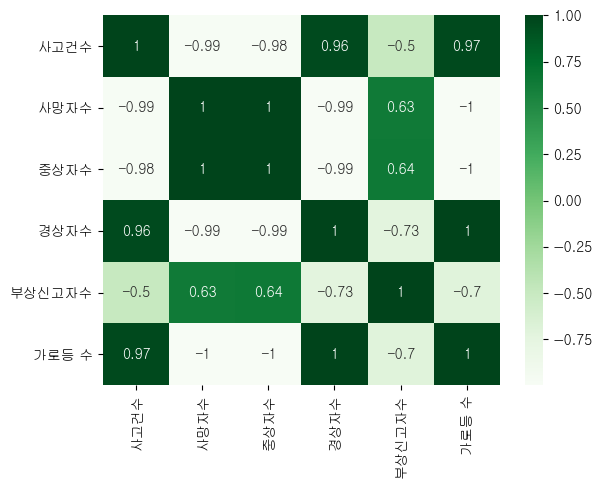

In [28]:
sns.heatmap(ac_eda.corr(), annot=True, cmap='Greens')
plt.show()

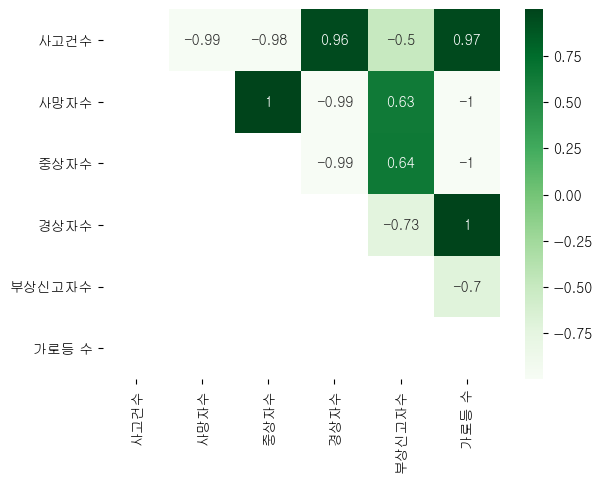

In [31]:
corr_matrix = ac_eda.corr()
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', mask=mask)
plt.show()

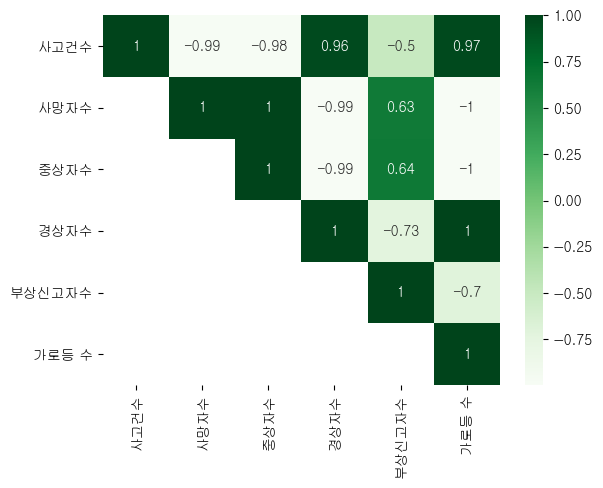

In [38]:
corr_matrix = ac_eda.corr()
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))
mask[np.diag_indices_from(mask)] = False

sns.heatmap(corr_matrix, annot=True, cmap='Greens', mask=mask)
plt.show()
